<a href="https://colab.research.google.com/github/lilJdub/-/blob/main/%E6%B1%BA%E7%AD%96%E7%A7%91%E5%AD%B8HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
from numpy import random
from random import randint
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from scipy.linalg import cholesky
from numpy.random import multivariate_normal

**Q1: Suppose a fraction 17% of the microchips produced by a leading manufacturer is 
defective. For the manufacturer, the number of microchips delivered to its client depends on 
how many microchips are inspected and accepted by 50 inspectors in the factory. Historically, 
given that a microchip is defective, an inspector wrongly accepts the chip 10% of the time, 
thinking it has no defect. If a microchip is not defective, an inspector, however, wrongly 
rejects the chip 5% of the time. In general, each of the 50 inspectors can inspect 20 chips per 
hour in a working day of 8 hours (lunch break NOT included in the 8 hours). 
Use the binomial distribution and whatever functions needed in Python to write a 
simulation program for the case above. In a working day, the microchips delivered to the 
client contain some good ones (correctly accepted) and some bad ones. In your simulation 
program, calculate the ratio of good ones to the sum of good and bad ones. The simulation 
program should be a function called dailychips. The function must return: 
1) the daily number of delivered chips (that is random) 
2) the daily ratio of good ones mentioned above. 
 Simulate the daily operations for 1,000 runs and answer the following questions.**

**The simulation program should be a function called dailychips. The function must return:
1) the daily number of delivered chips (that is random)
2) the daily ratio of good ones mentioned above.**

In [ ]:
def dailyChips():
  quality=["defect","nonDefect"]
  #一天最多可以檢查20個*8小時*50個檢查員=8000
  #回傳0~8000的random整數
  numbersDelivered=random.randint(1,8000)
  manufactureQuality=np.random.choice(quality,numbersDelivered,p=[0.17,0.83])
  nonDefected=np.where(manufactureQuality=="nonDefect")[0]
  #良率
  dailyRatio=len(nonDefected)/numbersDelivered
  return numbersDelivered,dailyRatio

Simulate the daily operations for 1,000 runs and answer the following questions.
(a) The manufacturer claims that the everyday chips delivered to its client has at least 98% good ones. What is the probability that such a claim is true?
(b) What is the probability that the manufacturer can deliver 6,400 microchips accepted by its inspectors in a typical working day of 8 hours? 

In [ ]:
S=1000
c=[]
g=[]
mistake=["mistaken","nonMistaken"]
for s in range(S):
  x=dailyChips()
  nonDefect=int(x[0]*x[1])
  defect=x[0]-nonDefect

  #良但被當成不良:
  ndm=np.random.choice(mistake,nonDefect,p=[0.05,0.95])
  nonDMistaken=len(np.where(ndm=="mistaken")[0])

  #不良但被當成良:
  dm=np.random.choice(mistake,defect,p=[0.10,0.90])
  defectMistaken=len(np.where(dm=="mistaken")[0])

  chosenGoodOnes=nonDefect-nonDMistaken+defectMistaken
  """
  a)The probability that 98% good ones is true?
  """
  prob=1-(defectMistaken/chosenGoodOnes)
  if prob>0.98:
    c.append("T")
  else:
    c.append("F")
  """
   (b) What is the probability that the manufacturer can deliver 6,400 microchips 
   accepted by its inspectors in a typical working day of 8 hours?
  """
  if chosenGoodOnes>=6400:
    g.append("T")
  else:
    g.append("F")
print(chosenGoodOnes)
#ans:A
claims=np.asarray(c)
totalclaim=np.where(claims=="T")[0]
print(len(totalclaim)/len(claims))
#ans:B
deliver=np.asarray(g)
totalDelivered=np.where(deliver=="T")[0]
print(len(totalDelivered)/1000)

2846
0.357
0.009


**Q2 : Use the dailychips function in Q1 to simulate montlychips and quarterlychips. The monthlychips is the sum of delivered chips over 30 days, whereas the quarterlychips is the sum of delivered chips over 90 days respectively. Ignore good ratios in the two cases and focus on the number of delivered chips over 30 and 90 days.
Generate 1,000 random samples for the two numbers (montly and quarterly) of delivered chips.**

In [ ]:
#simulation存這
cpAnswer=[]

def chipsProduced():
  monthlyChips=0
  quarterlyChips=0
  for i in range(1,91):
    if(i<=30):
      monthlyChips+=dailyChips()[0]
      quarterlyChips+=dailyChips()[0]
    else:
      quarterlyChips+=dailyChips()[0]
  return(monthlyChips,quarterlyChips)

#Sim for 1000 times
for s in range(100):
  cp=chipsProduced()
  cpAnswer.append(cp)

**Generate the hist function in matplotlib (set bins=20 or bigger) of the simulated montlychips and quarterlychips. Do they look like normal distributions?**

[(119775, 347695), (110072, 369692), (115325, 316854), (102776, 334491), (117768, 363988), (118011, 390471), (147203, 350193), (120731, 392128), (114817, 343566), (119003, 393658), (131881, 338947), (115331, 350766), (150796, 360856), (132414, 378397), (129701, 385285), (113834, 361052), (112665, 354754), (115063, 344779), (110792, 345221), (128611, 379771), (117550, 348381), (114121, 392644), (118326, 347424), (109111, 383466), (141385, 357904), (129115, 416738), (90934, 372812), (99793, 348416), (113644, 374732), (128951, 337288), (112008, 359121), (90959, 359937), (115240, 319407), (113957, 356833), (111695, 342666), (105829, 365679), (111247, 349040), (93106, 362411), (119519, 372440), (104285, 374889), (102018, 334858), (118956, 396030), (131217, 387120), (102829, 335945), (113617, 343952), (106806, 359934), (110323, 373076), (122547, 396378), (113068, 290569), (103299, 377552), (126086, 369917), (125348, 350131), (117288, 318584), (115208, 376240), (119408, 380861), (107480, 3484

(array([ 1.,  1.,  5., 11., 21., 26., 16., 11.,  7.,  1.]),
 array([290569. , 303185.9, 315802.8, 328419.7, 341036.6, 353653.5,
        366270.4, 378887.3, 391504.2, 404121.1, 416738. ]),
 <a list of 10 Patch objects>)

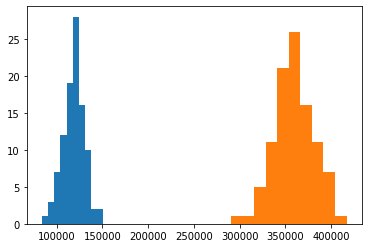

In [ ]:
print(cpAnswer)
mc=[]
qc=[]
for s in cpAnswer:
  mc.append(s[0])
  qc.append(s[1])
plt.hist(mc)
plt.hist(qc)

Use the shaprio function in Scipy to examine normality of montlychips and quarterlychips (if 
p-value<=0.05, reject H0: Normality holds). Do you find any evidence for normality? If yes, 
can you provide theoretical explanations for that (hint: check chapter 3 for a theorem)?

In [ ]:
stats.shapiro(mc)

ShapiroResult(statistic=0.9923090934753418, pvalue=0.8431437611579895)

In [ ]:
stats.shapiro(qc)

ShapiroResult(statistic=0.9895591735839844, pvalue=0.6290500164031982)

**Q3: Let’s revisit the Conley Fisheries in Lecture 5. Define stochastic demand for cold 
fish as DGlou triangular (min=4000, max=8000, mode=6000) and DRock triangular (min=4500, 
max=7500, mode=6000) as. The prices are random PriceGlou Normal(μ=3.5/lb, σ=0.5/lb) and 
PriceRock Normal(μ=3.65/lb, σ=0.25/lb). Also, corr(PriceGlou, PriceRock) is not zero.In addition, the Conley Fisheries has two boats (each with a full load of 3800 lbs) driven 
by captain Rick and captain Morty. The daily fraction captured by Risk is a uniform(0.5, 1.0) 
random variable whereas the daily fraction captured by Morty is a triangular(min=0.5, max=1, 
mode=0.75) random variable. The day-to-day operating costs for both boats are about $7,200. 
Being the business analyst of Conley Fisheries, you lay out four possible selling strategies: 
a) Rick goes to Glou and Morty goes to Rock; b) Rick goes to Rock and Morty goes to Glou; 
c) Rick and Morty go to Glou; d) Rick and Morty go to Rock. 
To assess which strategy is more profitable/less risky, write a simulation program that 
allows one to compute expected profit and CVAR(5%) for the four selling strategies above. 
After that, please finish the following tasks.**

In [ ]:
def correlatedPrice(c):
  muGlou=3.5
  muRock=3.65
  sigmaGlou=0.5
  sigmaRock=0.25
  correlation=c
  sigmaGR=np.array([[sigmaGlou*sigmaGlou,sigmaGlou*sigmaRock*correlation],
                    [sigmaGlou*sigmaRock*correlation,sigmaRock*sigmaRock]])
  price=multivariate_normal([muGlou,muRock],sigmaGR,1)
  return price

**(1) Show a figure where the y-axis is expected profit and x-axis is corr
(PriceGlou, PriceRock). 
For each of the following values in the x-axis: -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, and 
0.8, simulate 10,000 runs respectively. Compute the payoff of the four strategies and plot 
expected profits. The figure is supposed to show four lines (in different colors and types)**

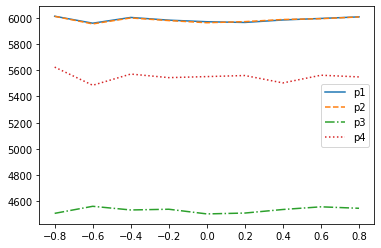

In [ ]:
#Simulations
corr=[-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8]
Cvar1,Cvar2,Cvar3,Cvar4=[],[],[],[]
P1F,P2F,P3F,P4F=[],[],[],[]
C=[]
for c in corr:
  #四種狀況的陣列
  P1,P2,P3,P4=[],[],[],[]
  #各跑一萬次
  for i in range(10000):
    #市場價
    x=correlatedPrice(c)
    glouPrice=x[0][0]
    rockPrice=x[0][1]
    #需求量
    DGlou=random.triangular(4000,6000,8000)
    DRock=random.triangular(4500,6000,7500)
    #捕撈量
    rick=3800*random.uniform(0.5,1.0,1)[0]
    morty=3800*random.triangular(0.5,0.75,1.0,1)[0]
    #payoff1:Rick goes to Glou and Morty goes to Rock
    p1=(glouPrice*rick+rockPrice*morty)-14400
    #payoff2:Rick goes to Rock and Morty goes to Glou
    p2=(glouPrice*morty+rockPrice*rick)-14400
    #payoff3:Rick and Morty go to Glou
    p3=(glouPrice*min(DGlou,morty+rick))-14400
    #payoff4: Rick and Morty go to Rock.
    p4=(rockPrice*min(DRock,morty+rick))-14400
    P1.append(p1)
    P2.append(p2)
    P3.append(p3)
    P4.append(p4)
  #結束後存放mean(順便把CVAR算了)
  P1F.append(mean(P1))
  Cvar1.append(np.quantile(P1,0.05))
  P2F.append(mean(P2))
  Cvar2.append(np.quantile(P2,0.05))
  P3F.append(mean(P3))
  Cvar3.append(np.quantile(P3,0.05))
  P4F.append(mean(P4))
  Cvar4.append(np.quantile(P4,0.05))
  #存放當時的correlation
  C.append(c)
plt.plot(C,P1F,label="p1",linestyle="-")
plt.plot(C,P2F,label="p2",linestyle="--")
plt.plot(C,P3F,label="p3",linestyle="-.")
plt.plot(C,P4F,label="p4",linestyle=":")
plt.legend()
plt.show()

'(2) Show a figure where the y-axis is CVAR(5%) and x-axis is corr(PriceGlou, PriceRock). For 
each of the following values in the x-axis: -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, and 0.8, 
simulate 10,000 runs respectively. Compute the payoff of the four strategies and plot their 
CVAR(5%) values. The figure should exhibit four lines (in different colors and types).

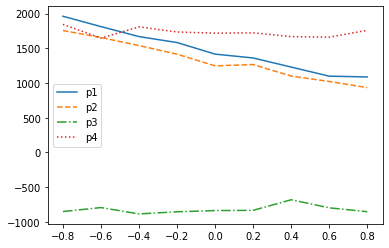

In [ ]:
plt.plot(C,Cvar1,label="p1",linestyle="-")
plt.plot(C,Cvar2,label="p2",linestyle="--")
plt.plot(C,Cvar3,label="p3",linestyle="-.")
plt.plot(C,Cvar4,label="p4",linestyle=":")
plt.legend()
plt.show()

**(C)Provide a succinct and logical discussion about findings in the two figures above. Also, 
explain what kind of selling strategies you would recommend the CEO to adopt**

Findings:待補。
Selling strategies:P4,it has the highest Cvar and a pretty decent payoff.

**Q4 (20%) Suppose you have successfully built a start-up and are looking to sell your 
business for early retirement. 
The maximum value each potential acquirer (a) is willing to 
pay is an independently and normally distributed RV Xa~Normal(μ=$3,000,000, σ=350,000)**


(1) If you can get two potential acquirers bidding against one another, how much money do 
you expect to receive by selling the firm?

In [ ]:
S=1000
exp=0
for s in range(S):
  aq1=random.normal(loc=3000000, scale=350000, size=2)
  aqFinal=max(aq1)
  exp+=aqFinal
finalexp2=exp/S
print(finalexp2)

3196754.805949485


(2)How much more would you expect to get if you can find a third bidder?

In [ ]:
S2=1000
exp=0
for s2 in range(S2):
  aq1=random.normal(loc=3000000, scale=350000, size=3)
  aqFinal=max(aq1)
  exp+=aqFinal
finalexp3=exp/S2
print(finalexp3)
print(finalexp3-finalexp2)

3283607.1184380646
86852.31248857966


(3) How much money do you expect to get if you can find 10 competitors to bid for your firm? 
What have you observed from simulation results? Can you provide logical explanations 
for the observed outcomes/patterns?

In [ ]:
S3=1000
exp=0
for s3 in range(S3):
  aq3=random.normal(loc=3000000, scale=350000, size=10)
  aqFinal=max(aq3)
  exp+=aqFinal
finalexp10=exp/S3
print(finalexp10)

3531447.2160871523


simulation results:越多競爭者答案會變大-因為更容易出現離群的較大值被選擇的情況